## Accunts classifications

In [597]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import time
from time import sleep
from time import process_time
from datetime import datetime
import itertools

#Preprocessamento
from sklearn import preprocessing
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import cross_validate, cross_val_score


#Regressão Linear
from sklearn.linear_model import LinearRegression

#Avaliacao do Modelo
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from collections import Counter


#KNN
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions

#Decision Tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import graphviz

### Funções a serem usadas

In [20]:
def valueMetrics(y_test, y_predict):

    print('-------')
    print('Metrics')
    print('-------')

    print('Acurácia:', metrics.accuracy_score(y_test, y_predict))
    
    print('\n------------')
    print('Micro: Calcule métricas globalmente, contando o total de tp, fn e fp.')
    print('Micro: Calcule métricas para cada classe e encontre sua média não ponderada.')
    print('------------')
    
    print('\nPrecisão normal:', metrics.precision_score(y_test, y_predict))
    print('Precisão macro:', metrics.precision_score(y_test, y_predict, average='macro'))
    print('Precisão micro:', metrics.precision_score(y_test, y_predict, average='micro'))
    
    print('\nRecall normal:', metrics.recall_score(y_test, y_predict))
    print('\nRecall macro:', metrics.recall_score(y_test, y_predict, average='macro'))
    print('Recall micro:', metrics.recall_score(y_test, y_predict, average='micro'))
    
    print('\nF1-Score normal:', metrics.f1_score(y_test, y_predict ))
    print('\nF1-Score macro:', metrics.f1_score(y_test, y_predict ,average='macro'))
    print('F1-Score micro:', metrics.f1_score(y_test, y_predict ,average='micro'))
    
    print('\nFbeta1 normal:', metrics.fbeta_score(y_test, y_predict, beta=1))
    print('\nFbeta1 macro:', metrics.fbeta_score(y_test, y_predict ,average='macro', beta=1))
    print('Fbeta1 micro:', metrics.fbeta_score(y_test, y_predict ,average='micro', beta=1))
    
    print('\nFbeta2 normal:', metrics.fbeta_score(y_test, y_predict ,beta=2))
    print('\nFbeta2 macro:', metrics.fbeta_score(y_test, y_predict ,average='macro', beta=2))
    print('Fbeta2 micro:', metrics.fbeta_score(y_test, y_predict ,average='micro', beta=2))
    
    print('\nFbeta200 normal:', metrics.fbeta_score(y_test, y_predict ,beta=200))
    print('\nFbeta200 macro:', metrics.fbeta_score(y_test, y_predict ,average='macro', beta=200))
    print('Fbeta200 micro:', metrics.fbeta_score(y_test, y_predict ,average='micro', beta=200))
    

In [22]:
def metrics_structure():
    results = pd.DataFrame({'Acuracy':[],
                            'Precision':[],
                            'Recall':[],
                            'F1-score':[],
                            'F-beta':[],
                            'MCC':[],
                            'TP':[],
                            'TN':[],
                            'ROC Curve':[]}, )
    results.index.names = ['Algoritmos']
    return results

In [591]:
def analysis(X_test, y_test, y_predict, model,text):
    print(text, end='\n\n')

    print(classification_report(y_test, y_predict))

    acuracy = metrics.accuracy_score(y_test, y_predict)
    precision = metrics.precision_score(y_test, y_predict)
    recall= metrics.recall_score(y_test, y_predict)
    f_score = metrics.f1_score(y_test, y_predict)
    f_beta = metrics.fbeta_score(y_test, y_predict, beta=2)
    ROC_auc_curve = metrics.roc_auc_score(y_test, y_predict)
    
    TP = len(y_test[(y_test==1) & (y_predict==1)]) #é falha 3% -> True Positive
    TN = len(y_test[(y_test==0) & (y_predict==0)]) #não é falha 97% -> True Negative
    
    
    tp = len(y_test[(y_test==1) & (y_predict==1)])
    tn = len(y_test[(y_test==0) & (y_predict==0)])
    fp = len(y_test[(y_test==0) & (y_predict==1)])
    fn = len(y_test[(y_test==1) & (y_predict==0)])  
    
    MCC = metrics.matthews_corrcoef(y_test, y_predict)
    
    #print(metrics.matthews_corrcoef(y_test, y_predict), MCC)
    
    results = [acuracy, precision, recall, f_score, f_beta, MCC, tp, tn]
    #print('[acuracy, precision, recall, f_score, f_beta, MCC, TP, TN, ROC_auc_curve]')
    #print(results)
    
    results_metrics = metrics_structure()
    results = [acuracy, precision, recall, f_score, f_beta, MCC, tp, tn, ROC_auc_curve]
    results_metrics = results_metrics.append(pd.DataFrame([results], index=[text], columns=results_metrics.columns))
    print(results_metrics)

    
    #Compute confusion matrix

    cnf_matrix = confusion_matrix(y_test, y_predict)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix,[0,1])
    plt.show()

In [599]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [456]:
def count_sent_recived(accounts, user_to, user_from):
    '''
    Calcula a quantidade de vezes que uma conta recebeu e enviou transações.
    Receber como parâmetro a lista de contas, a lista de user_to e user_from
    '''
    sent = []
    received = []
    for i in tqdm(accounts): 
        s = np.count_nonzero(user_to == i)
        r = np.count_nonzero(user_from == i)
        
        sent.append(s)
        received.append(r)
    
    sent, received = pd.Series(sent), pd.Series(received)

    return sent, received
        

In [457]:
def count_contracts(df, accounts):
    '''
    Função para calcular a quantidade de contratos que uma conta envia e quantos
    contratos ela recebe. Para isso a função recebe a base de dados das transações
    e as contas presentes na base
    '''
    contracts_sent = []
    contracts_received = []
    
    for a in tqdm(accounts):
        
        c_s = sum(df.value[df.user_from == a] == 0)
        contracts_sent.append(c_s)
        
        c_r = sum(df.value[df.user_to == a] == 0)
        contracts_received.append(c_r)
        
    return contracts_sent, contracts_received

In [458]:
def oversampling(X, y):
    '''
    Faz o oversampling dos dados a partir do X e do Y de teste
    '''
    ros = RandomOverSampler(sampling_strategy='minority')
    X_ros, y_ros = ros.fit_resample(X, y)

    
    return X_ros, y_ros

In [459]:
def undersampling(X, y):
    '''
    Faz o undersampling dos dados a partir do X e do Y de teste
    '''
    rus = RandomUnderSampler() 
    # resampling X, y
    X_rus, y_rus = rus.fit_resample(X, y)
    
    # new class distribution
    return X_rus, y_rus

In [461]:
def normalize(*args):
    '''
    Normaliza os dados entre 0 e 1
    '''
    scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
    lista = [scaler.fit_transform(a) for a in args]

    return(lista)
    

In [462]:
def metrics_structure():
    results = pd.DataFrame({'Acuracy':[],
                            'Precision':[],
                            'Recall':[],
                            'F1-score':[],
                            'F-beta':[],
                            'MCC':[],
                            'TP':[],
                            'TN':[],
                            'ROC Curve':[]}, )
    results.index.names = ['Algoritmos']
    return results

In [592]:
def cv(X, y, model, name, balancer = None):

    results_cv = metrics_structure()
    
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    auc_media = 0
    
    skfold = StratifiedKFold(n_splits=10)
    
    for fold, (train_index, test_index) in tqdm(enumerate(skfold.split(X, y), 1)):
        start_time = time.time()
        X_train = X.iloc[train_index]
        y_train = y.iloc[train_index]  # Based on your code, you might need a ravel call here, but I would look into how you're generating your y
        X_test = X.iloc[test_index]
        y_test = y.iloc[test_index]  # See comment on ravel and  y_train
        if balancer is not None:
            X_train, y_train = balancer.fit_sample(X_train, y_train)
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test)
        print(f'For fold {fold}:')
        acuracy = metrics.accuracy_score(y_test, y_predict)
        precision = metrics.precision_score(y_test, y_predict)
        recall = metrics.recall_score(y_test, y_predict)
        f_score = metrics.f1_score(y_test, y_predict)
        f_beta = metrics.fbeta_score(y_test, y_predict, beta=2)
        ROC = metrics.roc_auc_score(y_test, y_predict)
        MCC = metrics.matthews_corrcoef(y_test, y_predict)
        TP = len(y_test[(y_test==1) & (y_predict==1)])
        TN = len(y_test[(y_test==0) & (y_predict==0)])
        
        tp += y_test[(y_test==1) & (y_predict==1)].count()
        tn += y_test[(y_test==0) & (y_predict==0)].count()
        fp += y_test[(y_test==0) & (y_predict==1)].count()
        fn += y_test[(y_test==1) & (y_predict==0)].count() 
        

        
        result_fold = [acuracy, precision, recall, f_score, f_beta, MCC, tp, tn, ROC]
        results_cv = results_cv.append(pd.DataFrame([result_fold], index=[('Fold' + str(fold))], columns=results_cv.columns))
        
        analysis(X_test, y_test, y_predict, model, name)
        
        if fold == 1:
            print('best fold', str(fold))
            bestROC = ROC
            bestModel = model
            analysis(X_test, y_test, y_predict, model, name)
        elif ROC > bestROC:
            print('best fold', str(fold))
            bestROC = ROC
            bestModel = model
            analysis(X_test, y_test, y_predict, model, name)
            
        
        elapsed_time = time.time() - start_time
        print('Tempo gasto fold', fold, '-', time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

    
    acur = (tp+tn)/(tp+tn+fp+fn)
    prec = 0 if tp + fp == 0 else tp/(tp+fp)
    reca = 0 if tp + fn == 0 else tp/(tp+fn)
    fbeta = 0 if reca + prec == 0 else (2*reca*prec)/(reca+prec)
    fbeta2 = (0 if reca + prec == 0 else (5*reca*prec)/((4*prec)+reca))
    MCC = metrics.matthews_corrcoef(y_test, y_predict) #(tp*tn-fp*fn)/sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
    auc = (tp/((tp+fn)*2)) + (tn/((tn+fp)*2))


    results_metrics = metrics_structure()
    results = [acur, prec, reca, fbeta, fbeta2, MCC, int(tp), int(tn), auc]
    results_metrics = results_metrics.append(pd.DataFrame([results], index=[name], columns=results_metrics.columns))
    
    return results_metrics, results_cv, bestModel

In [410]:
def cv_over_under(df, model, model_name,sampling, n_splits = 3):
    '''
    df -> Dataset
    n_splits -> quantidade de splits do kfold
    model -> modelo a ser avaliado
    model_name -> Texto do nome do modelo
    sampling -> True para oversampling e False para undersampling
    '''
    
    X = df[['balance_ether', 'total_transactions', 'sent', 'received', 'n_contracts_sent', 
            'n_contracts_received']].values
    y = df['classification'].values
    
    for i in range(2, n_splits):
        cv = KFold(n_splits=i, random_state=1, shuffle=True)
        print('Fold =', i)
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            #normaliza os dados
            X_train, X_test = normalize(X_train, X_test)
            
            #Faz undersampling ou oversampling
            if sampling: 
                print('Oversamplig')
                X_train, y_train = oversampling(X_train, y_train)
            else: 
                print('Undersampling')
                X_train, y_train = undersampling(X_train, y_train)
            
            #Treina o modelo e faz o predict
            model.fit(X_train, y_train)
            y_predict = model.predict(X_test) 
            
            analysis(X_test, y_test, y_predict, model, model_name)
            print('---------------------------------------------------------')

**Importando dados**

In [2]:
df = pd.read_csv('accounts_classification.csv')

In [162]:
df_transactions = pd.read_csv('dataset_fix_20200810.csv')

In [172]:
sent, received = count_sent_recived(df.user_account, df_transactions.user_to, df_transactions.user_from)

<ipython-input-169-c23827de1ff9>:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(accounts):


In [313]:
c_s, c_r = count_contracts(df_transactions, df.user_account)

In [174]:
df['sent'] = sent
df['received'] = received
df['n_contracts_sent'] = c_s
df['n_contracts_received'] = c_r

Tomando em consideração:

Normal user = 0

Exchange = 1

In [4]:
classes = df.classification

In [5]:
df['classification'] = df['classification'].replace('Normal user', 0)
df['classification'] = df['classification'].replace('Exchange', 1)

Os parâmetros a serem usados serão *balance_ether* e *total_transactions*. Como *balance_value* é o valor em dólar, essas duas features são diretamente correlacionadas

**Preprocessamento dos dados**

In [445]:
X = df.iloc[:,[1,3,5,6,7,8]]
y = df.iloc[:, 4]

In [373]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)

In [185]:
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 11832, 1: 82})
Counter({0: 5071, 1: 35})


**Undersample e Oversample**

In [601]:
nr = NearMiss()
smt = SMOTE()

### K-Nearest Neighbours

In [523]:
#Gera o modelo
knn = KNeighborsClassifier(n_neighbors = 5,weights='uniform', metric='canberra')

**Cross-Validation sem balanceamento**

For fold 1:
KNN

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1691
           1       0.36      0.45      0.40        11

    accuracy                           0.99      1702
   macro avg       0.68      0.72      0.70      1702
weighted avg       0.99      0.99      0.99      1702

      Acuracy  Precision    Recall  F1-score    F-beta       MCC   TP      TN  \
KNN  0.991187   0.357143  0.454545       0.4  0.431034  0.398547  5.0  1682.0   

     ROC Curve  
KNN   0.724612  
Confusion matrix, without normalization
[[1682    9]
 [   6    5]]


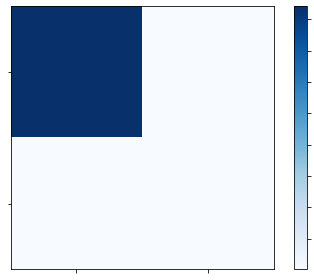

best fold 1
KNN

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1691
           1       0.36      0.45      0.40        11

    accuracy                           0.99      1702
   macro avg       0.68      0.72      0.70      1702
weighted avg       0.99      0.99      0.99      1702

      Acuracy  Precision    Recall  F1-score    F-beta       MCC   TP      TN  \
KNN  0.991187   0.357143  0.454545       0.4  0.431034  0.398547  5.0  1682.0   

     ROC Curve  
KNN   0.724612  
Confusion matrix, without normalization
[[1682    9]
 [   6    5]]


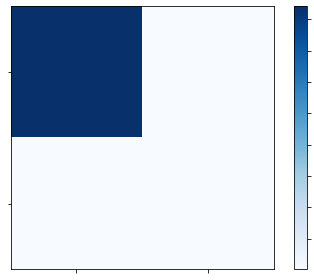

Tempo gasto fold 1 - 00:00:00
For fold 2:
KNN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1691
           1       0.60      0.82      0.69        11

    accuracy                           1.00      1702
   macro avg       0.80      0.91      0.84      1702
weighted avg       1.00      1.00      1.00      1702

     Acuracy  Precision    Recall  F1-score    F-beta       MCC   TP      TN  \
KNN   0.9953        0.6  0.818182  0.692308  0.762712  0.698437  9.0  1685.0   

     ROC Curve  
KNN   0.907317  
Confusion matrix, without normalization
[[1685    6]
 [   2    9]]


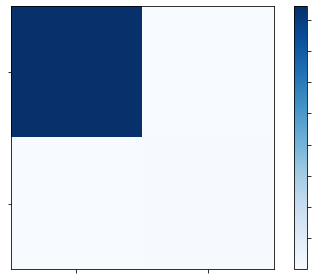

best fold 2
KNN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1691
           1       0.60      0.82      0.69        11

    accuracy                           1.00      1702
   macro avg       0.80      0.91      0.84      1702
weighted avg       1.00      1.00      1.00      1702

     Acuracy  Precision    Recall  F1-score    F-beta       MCC   TP      TN  \
KNN   0.9953        0.6  0.818182  0.692308  0.762712  0.698437  9.0  1685.0   

     ROC Curve  
KNN   0.907317  
Confusion matrix, without normalization
[[1685    6]
 [   2    9]]


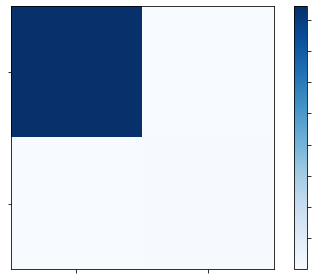

Tempo gasto fold 2 - 00:00:00
For fold 3:
KNN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1691
           1       0.56      0.45      0.50        11

    accuracy                           0.99      1702
   macro avg       0.78      0.73      0.75      1702
weighted avg       0.99      0.99      0.99      1702

      Acuracy  Precision    Recall  F1-score    F-beta       MCC   TP      TN  \
KNN  0.994125   0.555556  0.454545       0.5  0.471698  0.499608  5.0  1687.0   

     ROC Curve  
KNN    0.72609  
Confusion matrix, without normalization
[[1687    4]
 [   6    5]]


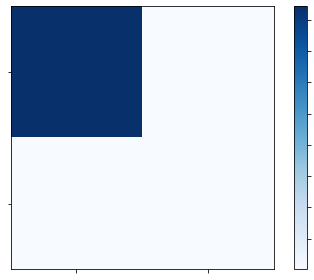

Tempo gasto fold 3 - 00:00:00
For fold 4:
KNN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       0.88      0.58      0.70        12

    accuracy                           1.00      1702
   macro avg       0.94      0.79      0.85      1702
weighted avg       1.00      1.00      1.00      1702

      Acuracy  Precision    Recall  F1-score  F-beta       MCC   TP      TN  \
KNN  0.996475      0.875  0.583333       0.7   0.625  0.712867  7.0  1689.0   

     ROC Curve  
KNN   0.791371  
Confusion matrix, without normalization
[[1689    1]
 [   5    7]]


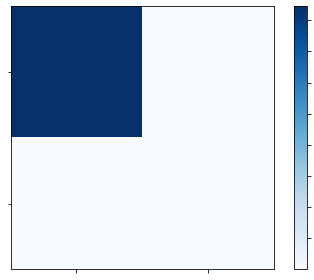

Tempo gasto fold 4 - 00:00:00
For fold 5:
KNN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       0.71      0.42      0.53        12

    accuracy                           0.99      1702
   macro avg       0.86      0.71      0.76      1702
weighted avg       0.99      0.99      0.99      1702

      Acuracy  Precision    Recall  F1-score    F-beta       MCC   TP      TN  \
KNN  0.994712   0.714286  0.416667  0.526316  0.454545  0.543192  5.0  1688.0   

     ROC Curve  
KNN   0.707742  
Confusion matrix, without normalization
[[1688    2]
 [   7    5]]


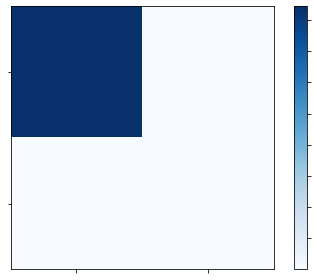

Tempo gasto fold 5 - 00:00:00
For fold 6:
KNN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       0.80      0.33      0.47        12

    accuracy                           0.99      1702
   macro avg       0.90      0.67      0.73      1702
weighted avg       0.99      0.99      0.99      1702

      Acuracy  Precision    Recall  F1-score    F-beta       MCC   TP      TN  \
KNN  0.994712        0.8  0.333333  0.470588  0.377358  0.514417  4.0  1689.0   

     ROC Curve  
KNN   0.666371  
Confusion matrix, without normalization
[[1689    1]
 [   8    4]]


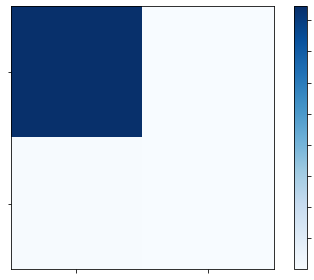

Tempo gasto fold 6 - 00:00:00
For fold 7:
KNN

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       1.00      0.08      0.15        12

    accuracy                           0.99      1702
   macro avg       1.00      0.54      0.58      1702
weighted avg       0.99      0.99      0.99      1702

      Acuracy  Precision    Recall  F1-score    F-beta      MCC   TP      TN  \
KNN  0.993537        1.0  0.083333  0.153846  0.102041  0.28774  1.0  1690.0   

     ROC Curve  
KNN   0.541667  
Confusion matrix, without normalization
[[1690    0]
 [  11    1]]


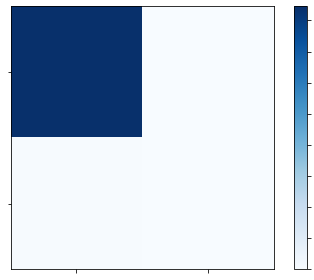

Tempo gasto fold 7 - 00:00:00
For fold 8:
KNN

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       1.00      0.08      0.15        12

    accuracy                           0.99      1702
   macro avg       1.00      0.54      0.58      1702
weighted avg       0.99      0.99      0.99      1702

      Acuracy  Precision    Recall  F1-score    F-beta      MCC   TP      TN  \
KNN  0.993537        1.0  0.083333  0.153846  0.102041  0.28774  1.0  1690.0   

     ROC Curve  
KNN   0.541667  
Confusion matrix, without normalization
[[1690    0]
 [  11    1]]


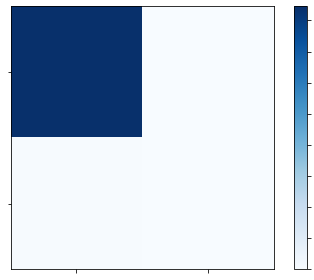

Tempo gasto fold 8 - 00:00:00
For fold 9:
KNN

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       0.00      0.00      0.00        12

    accuracy                           0.99      1702
   macro avg       0.50      0.50      0.50      1702
weighted avg       0.99      0.99      0.99      1702

      Acuracy  Precision  Recall  F1-score  F-beta  MCC   TP      TN  \
KNN  0.992949        0.0     0.0       0.0     0.0  0.0  0.0  1690.0   

     ROC Curve  
KNN        0.5  
Confusion matrix, without normalization
[[1690    0]
 [  12    0]]


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.

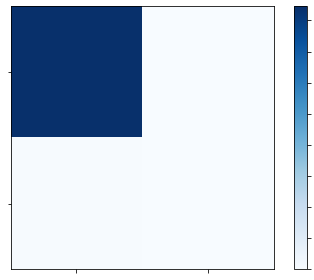

Tempo gasto fold 9 - 00:00:00
For fold 10:
KNN

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       0.67      0.17      0.27        12

    accuracy                           0.99      1702
   macro avg       0.83      0.58      0.63      1702
weighted avg       0.99      0.99      0.99      1702

      Acuracy  Precision    Recall  F1-score    F-beta       MCC   TP      TN  \
KNN  0.993537   0.666667  0.166667  0.266667  0.196078  0.331269  2.0  1689.0   

     ROC Curve  
KNN   0.583037  
Confusion matrix, without normalization
[[1689    1]
 [  10    2]]


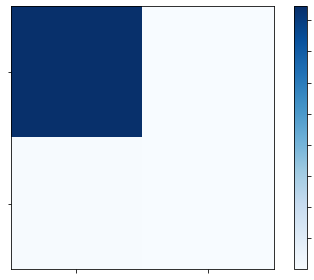

Tempo gasto fold 10 - 00:00:00



(      Acuracy  Precision    Recall  F1-score    F-beta       MCC    TP  \
 KNN  0.994007   0.619048  0.333333  0.433333  0.367232  0.331269  39.0   
 
           TN  ROC Curve  
 KNN  16879.0   0.665957  ,
          Acuracy  Precision    Recall  F1-score    F-beta       MCC    TP  \
 Fold1   0.991187   0.357143  0.454545  0.400000  0.431034  0.398547   5.0   
 Fold2   0.995300   0.600000  0.818182  0.692308  0.762712  0.698437  14.0   
 Fold3   0.994125   0.555556  0.454545  0.500000  0.471698  0.499608  19.0   
 Fold4   0.996475   0.875000  0.583333  0.700000  0.625000  0.712867  26.0   
 Fold5   0.994712   0.714286  0.416667  0.526316  0.454545  0.543192  31.0   
 Fold6   0.994712   0.800000  0.333333  0.470588  0.377358  0.514417  35.0   
 Fold7   0.993537   1.000000  0.083333  0.153846  0.102041  0.287740  36.0   
 Fold8   0.993537   1.000000  0.083333  0.153846  0.102041  0.287740  37.0   
 Fold9   0.992949   0.000000  0.000000  0.000000  0.000000  0.000000  37.0   
 Fold10  0.99

In [602]:
cv(X,y,knn,'KNN')

**Cross_validation UnderSample**

For fold 1:
KNN

              precision    recall  f1-score   support

           0       1.00      0.69      0.81      1691
           1       0.02      1.00      0.04        11

    accuracy                           0.69      1702
   macro avg       0.51      0.84      0.43      1702
weighted avg       0.99      0.69      0.81      1702

      Acuracy  Precision  Recall  F1-score   F-beta       MCC    TP      TN  \
KNN  0.689777   0.020408     1.0      0.04  0.09434  0.118473  11.0  1163.0   

     ROC Curve  
KNN   0.843879  
Confusion matrix, without normalization
[[1163  528]
 [   0   11]]


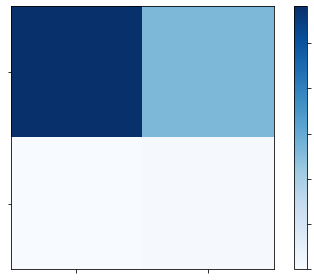

best fold 1
KNN

              precision    recall  f1-score   support

           0       1.00      0.69      0.81      1691
           1       0.02      1.00      0.04        11

    accuracy                           0.69      1702
   macro avg       0.51      0.84      0.43      1702
weighted avg       0.99      0.69      0.81      1702

      Acuracy  Precision  Recall  F1-score   F-beta       MCC    TP      TN  \
KNN  0.689777   0.020408     1.0      0.04  0.09434  0.118473  11.0  1163.0   

     ROC Curve  
KNN   0.843879  
Confusion matrix, without normalization
[[1163  528]
 [   0   11]]


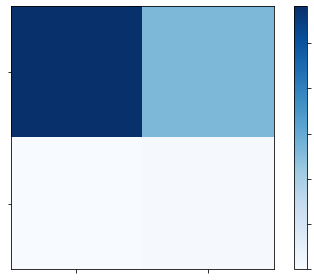

Tempo gasto fold 1 - 00:00:00
For fold 2:
KNN

              precision    recall  f1-score   support

           0       1.00      0.80      0.89      1691
           1       0.03      1.00      0.06        11

    accuracy                           0.80      1702
   macro avg       0.52      0.90      0.48      1702
weighted avg       0.99      0.80      0.88      1702

      Acuracy  Precision  Recall  F1-score    F-beta       MCC    TP      TN  \
KNN  0.802585     0.0317     1.0  0.061453  0.140665  0.159378  11.0  1355.0   

     ROC Curve  
KNN   0.900651  
Confusion matrix, without normalization
[[1355  336]
 [   0   11]]


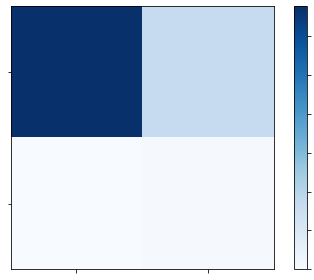

best fold 2
KNN

              precision    recall  f1-score   support

           0       1.00      0.80      0.89      1691
           1       0.03      1.00      0.06        11

    accuracy                           0.80      1702
   macro avg       0.52      0.90      0.48      1702
weighted avg       0.99      0.80      0.88      1702

      Acuracy  Precision  Recall  F1-score    F-beta       MCC    TP      TN  \
KNN  0.802585     0.0317     1.0  0.061453  0.140665  0.159378  11.0  1355.0   

     ROC Curve  
KNN   0.900651  
Confusion matrix, without normalization
[[1355  336]
 [   0   11]]


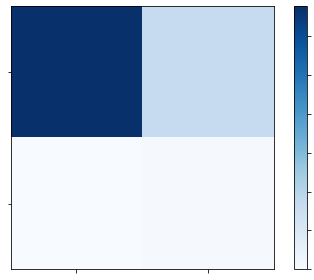

Tempo gasto fold 2 - 00:00:00
For fold 3:
KNN

              precision    recall  f1-score   support

           0       1.00      0.82      0.90      1691
           1       0.03      0.91      0.06        11

    accuracy                           0.82      1702
   macro avg       0.52      0.87      0.48      1702
weighted avg       0.99      0.82      0.90      1702

      Acuracy  Precision    Recall  F1-score   F-beta       MCC    TP      TN  \
KNN  0.824912   0.032573  0.909091  0.062893  0.14245  0.152857  10.0  1394.0   

     ROC Curve  
KNN   0.866728  
Confusion matrix, without normalization
[[1394  297]
 [   1   10]]


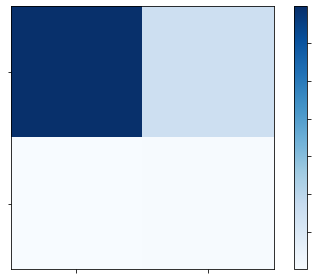

Tempo gasto fold 3 - 00:00:00
For fold 4:
KNN

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      1690
           1       0.06      1.00      0.11        12

    accuracy                           0.89      1702
   macro avg       0.53      0.94      0.53      1702
weighted avg       0.99      0.89      0.93      1702

      Acuracy  Precision  Recall  F1-score    F-beta       MCC    TP      TN  \
KNN  0.887779   0.059113     1.0  0.111628  0.239044  0.228981  12.0  1499.0   

     ROC Curve  
KNN   0.943491  
Confusion matrix, without normalization
[[1499  191]
 [   0   12]]


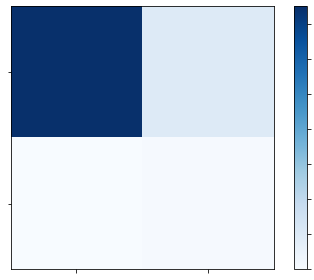

best fold 4
KNN

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      1690
           1       0.06      1.00      0.11        12

    accuracy                           0.89      1702
   macro avg       0.53      0.94      0.53      1702
weighted avg       0.99      0.89      0.93      1702

      Acuracy  Precision  Recall  F1-score    F-beta       MCC    TP      TN  \
KNN  0.887779   0.059113     1.0  0.111628  0.239044  0.228981  12.0  1499.0   

     ROC Curve  
KNN   0.943491  
Confusion matrix, without normalization
[[1499  191]
 [   0   12]]


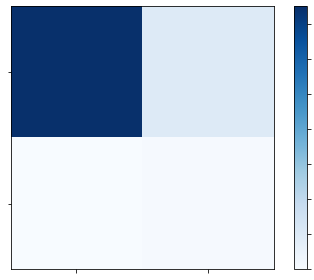

Tempo gasto fold 4 - 00:00:00
For fold 5:
KNN

              precision    recall  f1-score   support

           0       1.00      0.86      0.93      1690
           1       0.05      1.00      0.09        12

    accuracy                           0.86      1702
   macro avg       0.52      0.93      0.51      1702
weighted avg       0.99      0.86      0.92      1702

      Acuracy  Precision  Recall  F1-score    F-beta       MCC    TP      TN  \
KNN  0.864277   0.049383     1.0  0.094118  0.206186  0.206477  12.0  1459.0   

     ROC Curve  
KNN   0.931657  
Confusion matrix, without normalization
[[1459  231]
 [   0   12]]


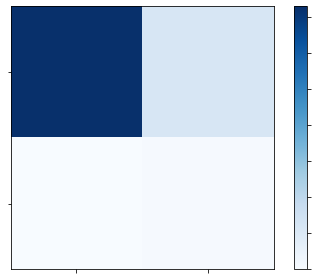

Tempo gasto fold 5 - 00:00:00
For fold 6:
KNN

              precision    recall  f1-score   support

           0       1.00      0.87      0.93      1690
           1       0.05      0.92      0.09        12

    accuracy                           0.87      1702
   macro avg       0.52      0.89      0.51      1702
weighted avg       0.99      0.87      0.92      1702

      Acuracy  Precision    Recall  F1-score    F-beta       MCC    TP  \
KNN  0.871328   0.048035  0.916667  0.091286  0.198556  0.193135  11.0   

         TN  ROC Curve  
KNN  1472.0   0.893836  
Confusion matrix, without normalization
[[1472  218]
 [   1   11]]


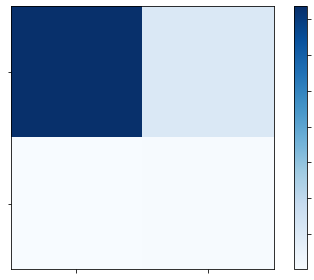

Tempo gasto fold 6 - 00:00:00
For fold 7:
KNN

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1690
           1       0.15      0.83      0.25        12

    accuracy                           0.96      1702
   macro avg       0.57      0.90      0.62      1702
weighted avg       0.99      0.96      0.98      1702

      Acuracy  Precision    Recall  F1-score    F-beta       MCC    TP  \
KNN  0.964747   0.147059  0.833333      0.25  0.431034  0.341356  10.0   

         TN  ROC Curve  
KNN  1632.0   0.899507  
Confusion matrix, without normalization
[[1632   58]
 [   2   10]]


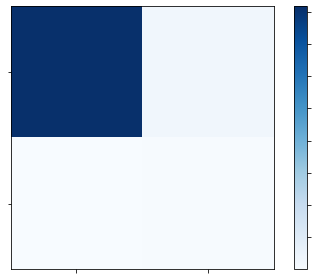

Tempo gasto fold 7 - 00:00:00
For fold 8:
KNN

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1690
           1       0.07      0.83      0.13        12

    accuracy                           0.92      1702
   macro avg       0.54      0.88      0.55      1702
weighted avg       0.99      0.92      0.95      1702

      Acuracy  Precision    Recall  F1-score   F-beta       MCC    TP      TN  \
KNN  0.923032   0.071942  0.833333   0.13245  0.26738  0.231283  10.0  1561.0   

     ROC Curve  
KNN   0.878501  
Confusion matrix, without normalization
[[1561  129]
 [   2   10]]


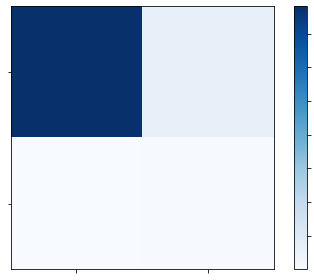

Tempo gasto fold 8 - 00:00:00
For fold 9:
KNN

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      1690
           1       0.04      0.75      0.08        12

    accuracy                           0.88      1702
   macro avg       0.52      0.82      0.51      1702
weighted avg       0.99      0.88      0.93      1702

      Acuracy  Precision  Recall  F1-score  F-beta       MCC   TP      TN  \
KNN  0.884841   0.044554    0.75  0.084112    0.18  0.164487  9.0  1497.0   

     ROC Curve  
KNN   0.817899  
Confusion matrix, without normalization
[[1497  193]
 [   3    9]]


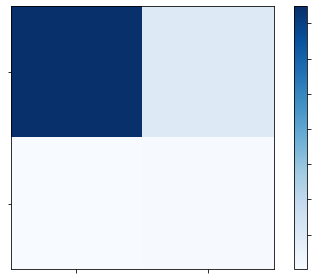

Tempo gasto fold 9 - 00:00:00
For fold 10:
KNN

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      1690
           1       0.06      0.83      0.11        12

    accuracy                           0.91      1702
   macro avg       0.53      0.87      0.53      1702
weighted avg       0.99      0.91      0.94      1702

     Acuracy  Precision    Recall  F1-score    F-beta       MCC    TP      TN  \
KNN  0.90658    0.05988  0.833333  0.111732  0.232558  0.208261  10.0  1533.0   

     ROC Curve  
KNN   0.870217  
Confusion matrix, without normalization
[[1533  157]
 [   2   10]]


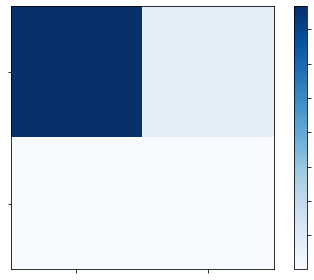

Tempo gasto fold 10 - 00:00:00



(      Acuracy  Precision    Recall  F1-score    F-beta       MCC     TP  \
 KNN  0.861986   0.043372  0.905983   0.08278  0.182005  0.208261  106.0   
 
           TN  ROC Curve  
 KNN  14565.0   0.883832  ,
          Acuracy  Precision    Recall  F1-score    F-beta       MCC     TP  \
 Fold1   0.689777   0.020408  1.000000  0.040000  0.094340  0.118473   11.0   
 Fold2   0.802585   0.031700  1.000000  0.061453  0.140665  0.159378   22.0   
 Fold3   0.824912   0.032573  0.909091  0.062893  0.142450  0.152857   32.0   
 Fold4   0.887779   0.059113  1.000000  0.111628  0.239044  0.228981   44.0   
 Fold5   0.864277   0.049383  1.000000  0.094118  0.206186  0.206477   56.0   
 Fold6   0.871328   0.048035  0.916667  0.091286  0.198556  0.193135   67.0   
 Fold7   0.964747   0.147059  0.833333  0.250000  0.431034  0.341356   77.0   
 Fold8   0.923032   0.071942  0.833333  0.132450  0.267380  0.231283   87.0   
 Fold9   0.884841   0.044554  0.750000  0.084112  0.180000  0.164487   96.0   
 

In [603]:
cv(X,y,knn,'KNN', balancer=nr)

**Cross_validation OverSample**

For fold 1:
KNN

              precision    recall  f1-score   support

           0       1.00      0.93      0.97      1691
           1       0.09      1.00      0.17        11

    accuracy                           0.94      1702
   macro avg       0.55      0.97      0.57      1702
weighted avg       0.99      0.94      0.96      1702

     Acuracy  Precision  Recall  F1-score    F-beta      MCC    TP      TN  \
KNN  0.93537   0.090909     1.0  0.166667  0.333333  0.29154  11.0  1581.0   

     ROC Curve  
KNN   0.967475  
Confusion matrix, without normalization
[[1581  110]
 [   0   11]]


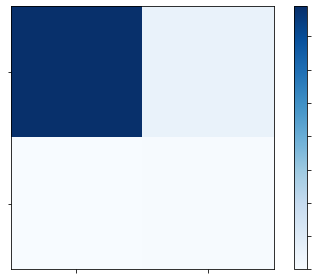

best fold 1
KNN

              precision    recall  f1-score   support

           0       1.00      0.93      0.97      1691
           1       0.09      1.00      0.17        11

    accuracy                           0.94      1702
   macro avg       0.55      0.97      0.57      1702
weighted avg       0.99      0.94      0.96      1702

     Acuracy  Precision  Recall  F1-score    F-beta      MCC    TP      TN  \
KNN  0.93537   0.090909     1.0  0.166667  0.333333  0.29154  11.0  1581.0   

     ROC Curve  
KNN   0.967475  
Confusion matrix, without normalization
[[1581  110]
 [   0   11]]


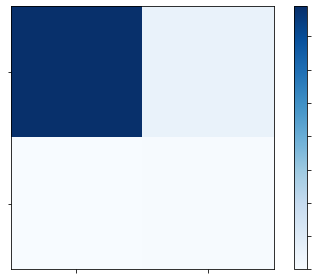

Tempo gasto fold 1 - 00:00:00
For fold 2:
KNN

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1691
           1       0.12      0.91      0.21        11

    accuracy                           0.95      1702
   macro avg       0.56      0.93      0.59      1702
weighted avg       0.99      0.95      0.97      1702

      Acuracy  Precision    Recall  F1-score    F-beta       MCC    TP  \
KNN  0.954759   0.116279  0.909091  0.206186  0.384615  0.316145  10.0   

         TN  ROC Curve  
KNN  1615.0   0.932074  
Confusion matrix, without normalization
[[1615   76]
 [   1   10]]


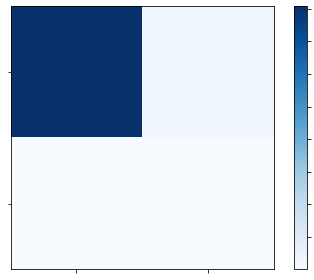

Tempo gasto fold 2 - 00:00:00
For fold 3:
KNN

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1691
           1       0.11      0.73      0.18        11

    accuracy                           0.96      1702
   macro avg       0.55      0.84      0.58      1702
weighted avg       0.99      0.96      0.97      1702

      Acuracy  Precision    Recall  F1-score    F-beta      MCC   TP      TN  \
KNN  0.958284   0.105263  0.727273  0.183908  0.333333  0.26656  8.0  1623.0   

     ROC Curve  
KNN    0.84353  
Confusion matrix, without normalization
[[1623   68]
 [   3    8]]


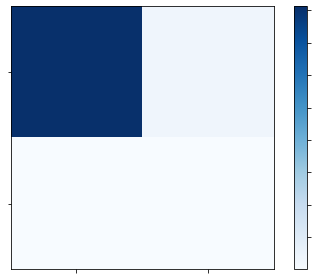

Tempo gasto fold 3 - 00:00:00
For fold 4:
KNN

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1690
           1       0.20      0.92      0.33        12

    accuracy                           0.97      1702
   macro avg       0.60      0.95      0.66      1702
weighted avg       0.99      0.97      0.98      1702

      Acuracy  Precision    Recall  F1-score    F-beta       MCC    TP  \
KNN  0.973561        0.2  0.916667  0.328358  0.533981  0.421409  11.0   

         TN  ROC Curve  
KNN  1646.0   0.945316  
Confusion matrix, without normalization
[[1646   44]
 [   1   11]]


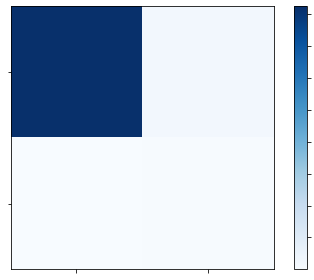

Tempo gasto fold 4 - 00:00:00
For fold 5:
KNN

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1690
           1       0.14      0.67      0.24        12

    accuracy                           0.97      1702
   macro avg       0.57      0.82      0.61      1702
weighted avg       0.99      0.97      0.98      1702

      Acuracy  Precision    Recall  F1-score    F-beta       MCC   TP      TN  \
KNN  0.969448   0.142857  0.666667  0.235294  0.384615  0.299382  8.0  1642.0   

     ROC Curve  
KNN   0.819132  
Confusion matrix, without normalization
[[1642   48]
 [   4    8]]


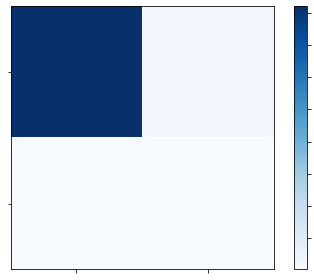

Tempo gasto fold 5 - 00:00:00
For fold 6:
KNN

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.29      1.00      0.44        12

    accuracy                           0.98      1702
   macro avg       0.64      0.99      0.72      1702
weighted avg       0.99      0.98      0.99      1702

      Acuracy  Precision  Recall  F1-score    F-beta       MCC    TP      TN  \
KNN  0.982374   0.285714     1.0  0.444444  0.666667  0.529757  12.0  1660.0   

     ROC Curve  
KNN   0.991124  
Confusion matrix, without normalization
[[1660   30]
 [   0   12]]


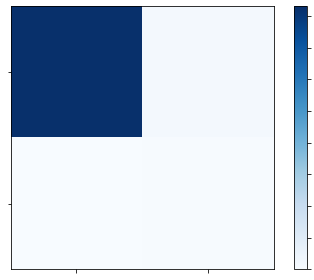

best fold 6
KNN

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.29      1.00      0.44        12

    accuracy                           0.98      1702
   macro avg       0.64      0.99      0.72      1702
weighted avg       0.99      0.98      0.99      1702

      Acuracy  Precision  Recall  F1-score    F-beta       MCC    TP      TN  \
KNN  0.982374   0.285714     1.0  0.444444  0.666667  0.529757  12.0  1660.0   

     ROC Curve  
KNN   0.991124  
Confusion matrix, without normalization
[[1660   30]
 [   0   12]]


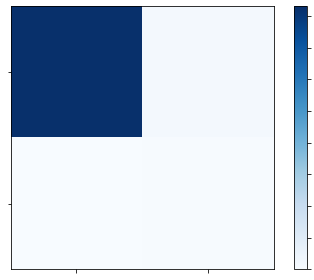

Tempo gasto fold 6 - 00:00:00
For fold 7:
KNN

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1690
           1       0.32      0.83      0.47        12

    accuracy                           0.99      1702
   macro avg       0.66      0.91      0.73      1702
weighted avg       0.99      0.99      0.99      1702

      Acuracy  Precision    Recall  F1-score    F-beta      MCC    TP      TN  \
KNN  0.986486   0.322581  0.833333  0.465116  0.632911  0.51364  10.0  1669.0   

     ROC Curve  
KNN   0.910454  
Confusion matrix, without normalization
[[1669   21]
 [   2   10]]


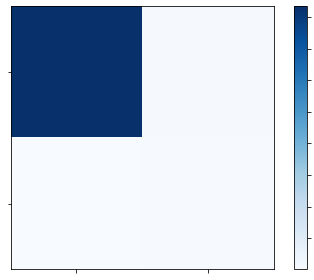

Tempo gasto fold 7 - 00:00:00
For fold 8:
KNN

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.15      0.42      0.22        12

    accuracy                           0.98      1702
   macro avg       0.57      0.70      0.61      1702
weighted avg       0.99      0.98      0.98      1702

      Acuracy  Precision    Recall  F1-score    F-beta       MCC   TP      TN  \
KNN  0.979436   0.151515  0.416667  0.222222  0.308642  0.242782  5.0  1662.0   

     ROC Curve  
KNN   0.700049  
Confusion matrix, without normalization
[[1662   28]
 [   7    5]]


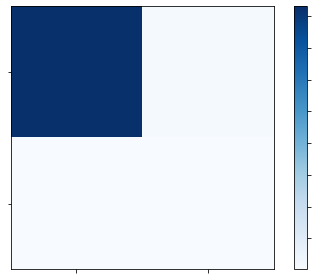

Tempo gasto fold 8 - 00:00:00
For fold 9:
KNN

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.21      0.75      0.33        12

    accuracy                           0.98      1702
   macro avg       0.60      0.86      0.66      1702
weighted avg       0.99      0.98      0.98      1702

      Acuracy  Precision  Recall  F1-score    F-beta       MCC   TP      TN  \
KNN  0.978261   0.209302    0.75  0.327273  0.494505  0.389161  9.0  1656.0   

     ROC Curve  
KNN   0.864941  
Confusion matrix, without normalization
[[1656   34]
 [   3    9]]


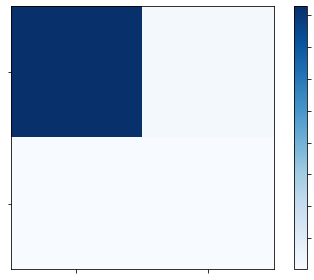

Tempo gasto fold 9 - 00:00:01
For fold 10:
KNN

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.27      0.92      0.42        12

    accuracy                           0.98      1702
   macro avg       0.63      0.95      0.70      1702
weighted avg       0.99      0.98      0.99      1702

      Acuracy  Precision    Recall  F1-score    F-beta       MCC    TP  \
KNN  0.981786   0.268293  0.916667  0.415094  0.617978  0.490542  11.0   

         TN  ROC Curve  
KNN  1660.0   0.949458  
Confusion matrix, without normalization
[[1660   30]
 [   1   11]]


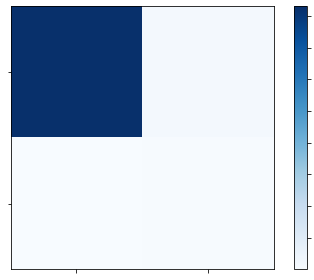

Tempo gasto fold 10 - 00:00:00



(      Acuracy  Precision    Recall  F1-score    F-beta       MCC    TP  \
 KNN  0.969976   0.162671  0.811966  0.271041  0.451521  0.490542  95.0   
 
           TN  ROC Curve  
 KNN  16414.0   0.891518  ,
          Acuracy  Precision    Recall  F1-score    F-beta       MCC    TP  \
 Fold1   0.935370   0.090909  1.000000  0.166667  0.333333  0.291540  11.0   
 Fold2   0.954759   0.116279  0.909091  0.206186  0.384615  0.316145  21.0   
 Fold3   0.958284   0.105263  0.727273  0.183908  0.333333  0.266560  29.0   
 Fold4   0.973561   0.200000  0.916667  0.328358  0.533981  0.421409  40.0   
 Fold5   0.969448   0.142857  0.666667  0.235294  0.384615  0.299382  48.0   
 Fold6   0.982374   0.285714  1.000000  0.444444  0.666667  0.529757  60.0   
 Fold7   0.986486   0.322581  0.833333  0.465116  0.632911  0.513640  70.0   
 Fold8   0.979436   0.151515  0.416667  0.222222  0.308642  0.242782  75.0   
 Fold9   0.978261   0.209302  0.750000  0.327273  0.494505  0.389161  84.0   
 Fold10  0.98

In [604]:
cv(X,y,knn,'KNN', balancer=smt)

### Decision Tree

In [605]:
dct = DecisionTreeClassifier(max_depth=5, max_features='sqrt', class_weight="balanced")

**Cross_validation sem balanceamento**

For fold 1:
Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      1691
           1       0.05      0.91      0.10        11

    accuracy                           0.90      1702
   macro avg       0.53      0.90      0.52      1702
weighted avg       0.99      0.90      0.94      1702

                Acuracy  Precision    Recall  F1-score    F-beta       MCC  \
Decision Tree  0.897767   0.054645  0.909091  0.103093  0.220264  0.208699   

                 TP      TN  ROC Curve  
Decision Tree  10.0  1518.0   0.903392  
Confusion matrix, without normalization
[[1518  173]
 [   1   10]]


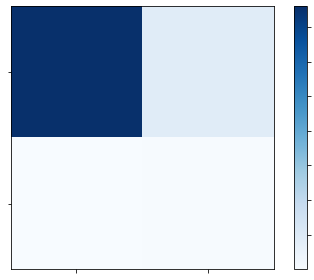

best fold 1
Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      1691
           1       0.05      0.91      0.10        11

    accuracy                           0.90      1702
   macro avg       0.53      0.90      0.52      1702
weighted avg       0.99      0.90      0.94      1702

                Acuracy  Precision    Recall  F1-score    F-beta       MCC  \
Decision Tree  0.897767   0.054645  0.909091  0.103093  0.220264  0.208699   

                 TP      TN  ROC Curve  
Decision Tree  10.0  1518.0   0.903392  
Confusion matrix, without normalization
[[1518  173]
 [   1   10]]


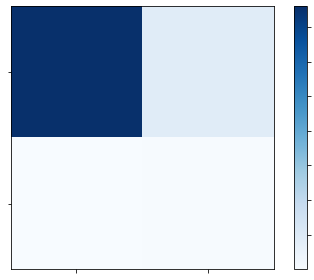

Tempo gasto fold 1 - 00:00:00
For fold 2:
Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      1691
           1       0.04      0.64      0.08        11

    accuracy                           0.90      1702
   macro avg       0.52      0.77      0.51      1702
weighted avg       0.99      0.90      0.94      1702

                Acuracy  Precision    Recall  F1-score   F-beta       MCC  \
Decision Tree  0.900118   0.040462  0.636364  0.076087  0.16129  0.142719   

                TP      TN  ROC Curve  
Decision Tree  7.0  1525.0   0.769098  
Confusion matrix, without normalization
[[1525  166]
 [   4    7]]


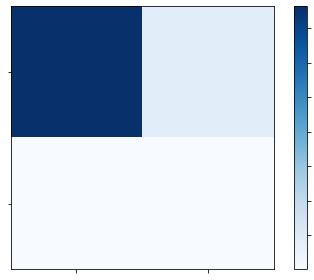

Tempo gasto fold 2 - 00:00:00
For fold 3:
Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1691
           1       0.07      0.91      0.13        11

    accuracy                           0.92      1702
   macro avg       0.54      0.92      0.55      1702
weighted avg       0.99      0.92      0.95      1702

                Acuracy  Precision    Recall  F1-score   F-beta       MCC  \
Decision Tree  0.922444   0.070922  0.909091  0.131579  0.27027  0.241759   

                 TP      TN  ROC Curve  
Decision Tree  10.0  1560.0   0.915811  
Confusion matrix, without normalization
[[1560  131]
 [   1   10]]


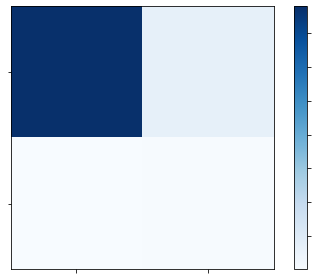

best fold 3
Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1691
           1       0.07      0.91      0.13        11

    accuracy                           0.92      1702
   macro avg       0.54      0.92      0.55      1702
weighted avg       0.99      0.92      0.95      1702

                Acuracy  Precision    Recall  F1-score   F-beta       MCC  \
Decision Tree  0.922444   0.070922  0.909091  0.131579  0.27027  0.241759   

                 TP      TN  ROC Curve  
Decision Tree  10.0  1560.0   0.915811  
Confusion matrix, without normalization
[[1560  131]
 [   1   10]]


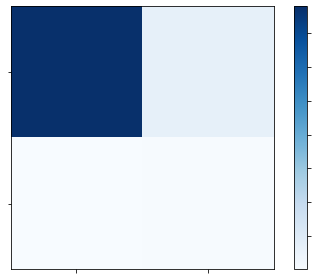

Tempo gasto fold 3 - 00:00:00
For fold 4:
Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1690
           1       0.12      0.92      0.21        12

    accuracy                           0.95      1702
   macro avg       0.56      0.93      0.59      1702
weighted avg       0.99      0.95      0.97      1702

                Acuracy  Precision    Recall  F1-score    F-beta       MCC  \
Decision Tree  0.952409   0.120879  0.916667  0.213592  0.395683  0.323333   

                 TP      TN  ROC Curve  
Decision Tree  11.0  1610.0   0.934665  
Confusion matrix, without normalization
[[1610   80]
 [   1   11]]


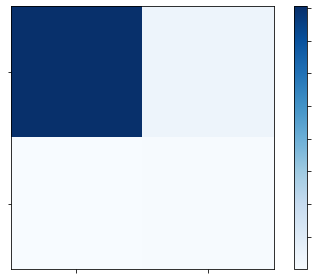

best fold 4
Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1690
           1       0.12      0.92      0.21        12

    accuracy                           0.95      1702
   macro avg       0.56      0.93      0.59      1702
weighted avg       0.99      0.95      0.97      1702

                Acuracy  Precision    Recall  F1-score    F-beta       MCC  \
Decision Tree  0.952409   0.120879  0.916667  0.213592  0.395683  0.323333   

                 TP      TN  ROC Curve  
Decision Tree  11.0  1610.0   0.934665  
Confusion matrix, without normalization
[[1610   80]
 [   1   11]]


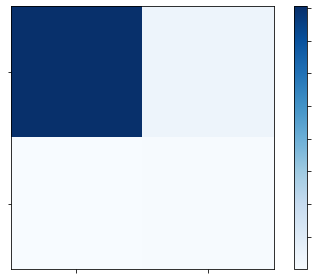

Tempo gasto fold 4 - 00:00:00
For fold 5:
Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1690
           1       0.11      0.92      0.20        12

    accuracy                           0.95      1702
   macro avg       0.56      0.93      0.59      1702
weighted avg       0.99      0.95      0.97      1702

                Acuracy  Precision    Recall  F1-score    F-beta       MCC  \
Decision Tree  0.948296   0.112245  0.916667       0.2  0.376712  0.310763   

                 TP      TN  ROC Curve  
Decision Tree  11.0  1603.0   0.932594  
Confusion matrix, without normalization
[[1603   87]
 [   1   11]]


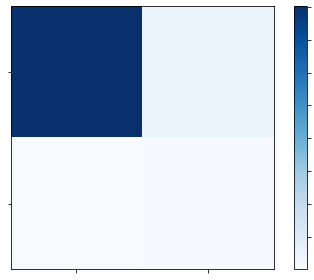

Tempo gasto fold 5 - 00:00:00
For fold 6:
Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1690
           1       0.12      0.92      0.21        12

    accuracy                           0.95      1702
   macro avg       0.56      0.93      0.59      1702
weighted avg       0.99      0.95      0.97      1702

                Acuracy  Precision    Recall  F1-score    F-beta       MCC  \
Decision Tree  0.952409   0.120879  0.916667  0.213592  0.395683  0.323333   

                 TP      TN  ROC Curve  
Decision Tree  11.0  1610.0   0.934665  
Confusion matrix, without normalization
[[1610   80]
 [   1   11]]


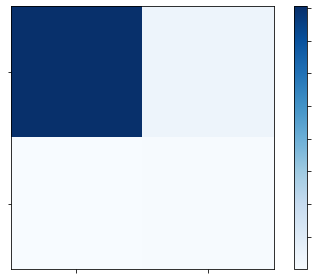

Tempo gasto fold 6 - 00:00:00
For fold 7:
Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.17      0.67      0.28        12

    accuracy                           0.98      1702
   macro avg       0.59      0.82      0.63      1702
weighted avg       0.99      0.98      0.98      1702

                Acuracy  Precision    Recall  F1-score    F-beta       MCC  \
Decision Tree  0.975323   0.173913  0.666667  0.275862  0.425532  0.332379   

                TP      TN  ROC Curve  
Decision Tree  8.0  1652.0   0.822091  
Confusion matrix, without normalization
[[1652   38]
 [   4    8]]


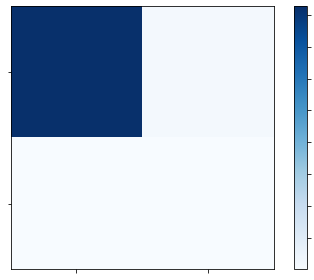

Tempo gasto fold 7 - 00:00:00
For fold 8:
Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1690
           1       0.21      0.50      0.30        12

    accuracy                           0.98      1702
   macro avg       0.61      0.74      0.65      1702
weighted avg       0.99      0.98      0.99      1702

                Acuracy  Precision  Recall  F1-score    F-beta       MCC   TP  \
Decision Tree  0.983549   0.214286     0.5       0.3  0.394737  0.320325  6.0   

                   TN  ROC Curve  
Decision Tree  1668.0   0.743491  
Confusion matrix, without normalization
[[1668   22]
 [   6    6]]


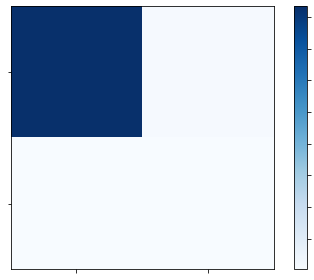

Tempo gasto fold 8 - 00:00:00
For fold 9:
Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.23      1.00      0.38        12

    accuracy                           0.98      1702
   macro avg       0.62      0.99      0.68      1702
weighted avg       0.99      0.98      0.98      1702

                Acuracy  Precision  Recall  F1-score  F-beta       MCC    TP  \
Decision Tree  0.976498   0.230769     1.0     0.375     0.6  0.474665  12.0   

                   TN  ROC Curve  
Decision Tree  1650.0   0.988166  
Confusion matrix, without normalization
[[1650   40]
 [   0   12]]


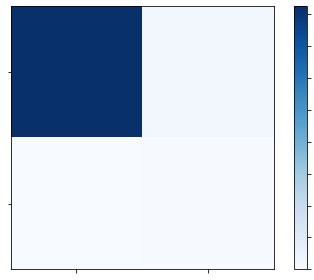

best fold 9
Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.23      1.00      0.38        12

    accuracy                           0.98      1702
   macro avg       0.62      0.99      0.68      1702
weighted avg       0.99      0.98      0.98      1702

                Acuracy  Precision  Recall  F1-score  F-beta       MCC    TP  \
Decision Tree  0.976498   0.230769     1.0     0.375     0.6  0.474665  12.0   

                   TN  ROC Curve  
Decision Tree  1650.0   0.988166  
Confusion matrix, without normalization
[[1650   40]
 [   0   12]]


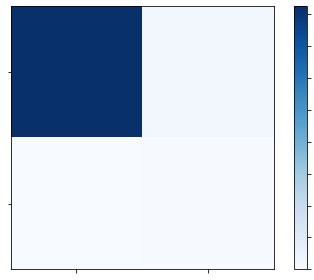

Tempo gasto fold 9 - 00:00:00
For fold 10:
Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.21      0.92      0.34        12

    accuracy                           0.98      1702
   macro avg       0.61      0.95      0.67      1702
weighted avg       0.99      0.98      0.98      1702

                Acuracy  Precision    Recall  F1-score  F-beta       MCC  \
Decision Tree  0.975323   0.211538  0.916667   0.34375    0.55  0.433863   

                 TP      TN  ROC Curve  
Decision Tree  11.0  1649.0   0.946203  
Confusion matrix, without normalization
[[1649   41]
 [   1   11]]


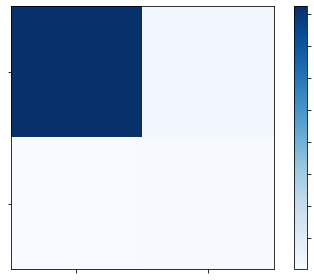

Tempo gasto fold 10 - 00:00:00



In [606]:
results_metrics, results_cv, bestModel = cv(X,y,dct,'Decision Tree')

In [611]:
results_metrics

,Acuracy,Precision,Recall,F1-score,F-beta,MCC,TP,TN,ROC Curve
Decision Tree,0.948414,0.101571,0.82906,0.18097,0.340829,0.433863,97.0,16045.0,0.88915


**Cross_validation UnderSample**

For fold 1:
Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.40      0.57      1691
           1       0.01      1.00      0.02        11

    accuracy                           0.41      1702
   macro avg       0.51      0.70      0.30      1702
weighted avg       0.99      0.41      0.57      1702

                Acuracy  Precision  Recall  F1-score    F-beta      MCC    TP  \
Decision Tree  0.407168   0.010784     1.0  0.021339  0.051692  0.06595  11.0   

                  TN  ROC Curve  
Decision Tree  682.0   0.701656  
Confusion matrix, without normalization
[[ 682 1009]
 [   0   11]]


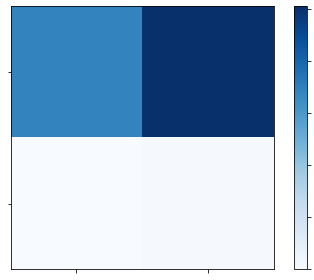

best fold 1
Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.40      0.57      1691
           1       0.01      1.00      0.02        11

    accuracy                           0.41      1702
   macro avg       0.51      0.70      0.30      1702
weighted avg       0.99      0.41      0.57      1702

                Acuracy  Precision  Recall  F1-score    F-beta      MCC    TP  \
Decision Tree  0.407168   0.010784     1.0  0.021339  0.051692  0.06595  11.0   

                  TN  ROC Curve  
Decision Tree  682.0   0.701656  
Confusion matrix, without normalization
[[ 682 1009]
 [   0   11]]


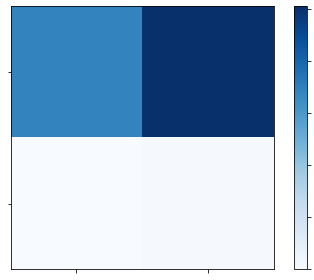

Tempo gasto fold 1 - 00:00:00
For fold 2:
Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.56      0.72      1691
           1       0.01      1.00      0.03        11

    accuracy                           0.57      1702
   macro avg       0.51      0.78      0.38      1702
weighted avg       0.99      0.57      0.72      1702

               Acuracy  Precision  Recall  F1-score    F-beta       MCC    TP  \
Decision Tree  0.56698   0.014706     1.0  0.028986  0.069444  0.091085  11.0   

                  TN  ROC Curve  
Decision Tree  954.0   0.782082  
Confusion matrix, without normalization
[[954 737]
 [  0  11]]


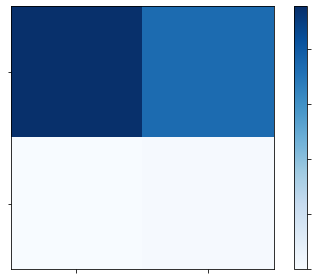

best fold 2
Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.56      0.72      1691
           1       0.01      1.00      0.03        11

    accuracy                           0.57      1702
   macro avg       0.51      0.78      0.38      1702
weighted avg       0.99      0.57      0.72      1702

               Acuracy  Precision  Recall  F1-score    F-beta       MCC    TP  \
Decision Tree  0.56698   0.014706     1.0  0.028986  0.069444  0.091085  11.0   

                  TN  ROC Curve  
Decision Tree  954.0   0.782082  
Confusion matrix, without normalization
[[954 737]
 [  0  11]]


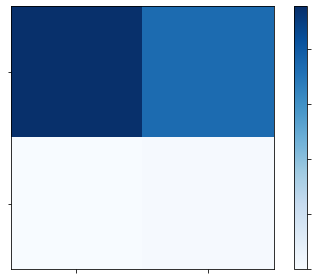

Tempo gasto fold 2 - 00:00:00
For fold 3:
Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1691
           1       0.04      0.91      0.07        11

    accuracy                           0.85      1702
   macro avg       0.52      0.88      0.49      1702
weighted avg       0.99      0.85      0.91      1702

                Acuracy  Precision    Recall  F1-score   F-beta       MCC  \
Decision Tree  0.846063     0.0369  0.909091  0.070922  0.15873  0.165296   

                 TP      TN  ROC Curve  
Decision Tree  10.0  1430.0   0.877372  
Confusion matrix, without normalization
[[1430  261]
 [   1   10]]


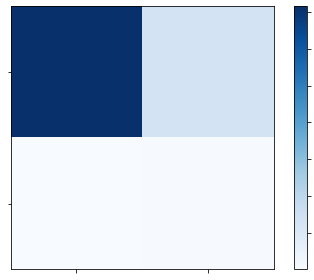

best fold 3
Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1691
           1       0.04      0.91      0.07        11

    accuracy                           0.85      1702
   macro avg       0.52      0.88      0.49      1702
weighted avg       0.99      0.85      0.91      1702

                Acuracy  Precision    Recall  F1-score   F-beta       MCC  \
Decision Tree  0.846063     0.0369  0.909091  0.070922  0.15873  0.165296   

                 TP      TN  ROC Curve  
Decision Tree  10.0  1430.0   0.877372  
Confusion matrix, without normalization
[[1430  261]
 [   1   10]]


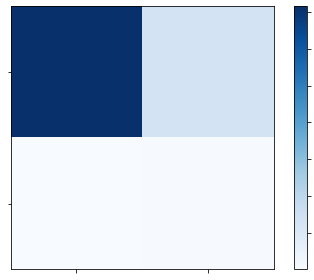

Tempo gasto fold 3 - 00:00:00
For fold 4:
Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.18      0.30      1690
           1       0.01      1.00      0.02        12

    accuracy                           0.19      1702
   macro avg       0.50      0.59      0.16      1702
weighted avg       0.99      0.19      0.30      1702

                Acuracy  Precision  Recall  F1-score    F-beta       MCC  \
Decision Tree  0.185664   0.008584     1.0  0.017021  0.041494  0.039294   

                 TP     TN  ROC Curve  
Decision Tree  12.0  304.0   0.589941  
Confusion matrix, without normalization
[[ 304 1386]
 [   0   12]]


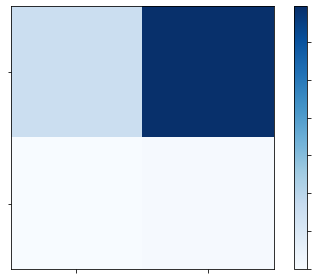

Tempo gasto fold 4 - 00:00:00
For fold 5:
Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.44      0.61      1690
           1       0.01      1.00      0.02        12

    accuracy                           0.45      1702
   macro avg       0.51      0.72      0.32      1702
weighted avg       0.99      0.45      0.61      1702

                Acuracy  Precision  Recall  F1-score    F-beta       MCC  \
Decision Tree  0.445358   0.012552     1.0  0.024793  0.059761  0.074437   

                 TP     TN  ROC Curve  
Decision Tree  12.0  746.0    0.72071  
Confusion matrix, without normalization
[[746 944]
 [  0  12]]


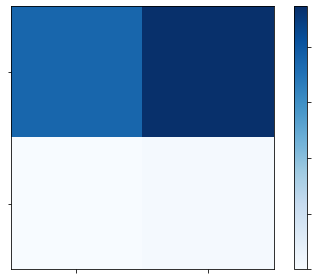

Tempo gasto fold 5 - 00:00:00
For fold 6:
Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.31      0.48      1690
           1       0.01      0.92      0.02        12

    accuracy                           0.32      1702
   macro avg       0.50      0.62      0.25      1702
weighted avg       0.99      0.32      0.47      1702

                Acuracy  Precision    Recall  F1-score    F-beta       MCC  \
Decision Tree  0.317861   0.009394  0.916667  0.018597  0.045119  0.041587   

                 TP     TN  ROC Curve  
Decision Tree  11.0  530.0   0.615138  
Confusion matrix, without normalization
[[ 530 1160]
 [   1   11]]


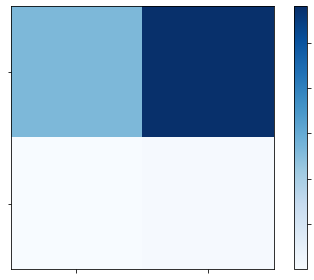

Tempo gasto fold 6 - 00:00:00
For fold 7:
Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1690
           1       0.14      0.83      0.25        12

    accuracy                           0.96      1702
   macro avg       0.57      0.90      0.61      1702
weighted avg       0.99      0.96      0.98      1702

               Acuracy  Precision    Recall  F1-score   F-beta       MCC  \
Decision Tree  0.96416   0.144928  0.833333  0.246914  0.42735  0.338726   

                 TP      TN  ROC Curve  
Decision Tree  10.0  1631.0   0.899211  
Confusion matrix, without normalization
[[1631   59]
 [   2   10]]


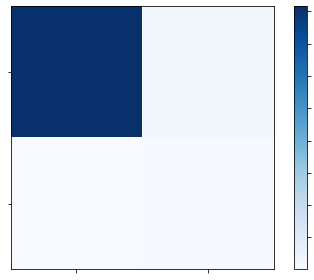

best fold 7
Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1690
           1       0.14      0.83      0.25        12

    accuracy                           0.96      1702
   macro avg       0.57      0.90      0.61      1702
weighted avg       0.99      0.96      0.98      1702

               Acuracy  Precision    Recall  F1-score   F-beta       MCC  \
Decision Tree  0.96416   0.144928  0.833333  0.246914  0.42735  0.338726   

                 TP      TN  ROC Curve  
Decision Tree  10.0  1631.0   0.899211  
Confusion matrix, without normalization
[[1631   59]
 [   2   10]]


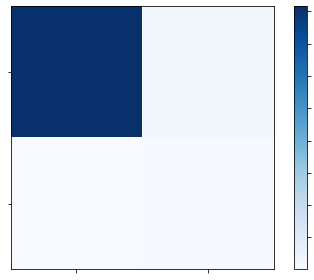

Tempo gasto fold 7 - 00:00:00
For fold 8:
Decision Tree

              precision    recall  f1-score   support

           0       0.98      0.07      0.13      1690
           1       0.01      0.83      0.01        12

    accuracy                           0.08      1702
   macro avg       0.49      0.45      0.07      1702
weighted avg       0.98      0.08      0.13      1702

                Acuracy  Precision    Recall  F1-score    F-beta       MCC  \
Decision Tree  0.076381   0.006329  0.833333  0.012563  0.030713 -0.031028   

                 TP     TN  ROC Curve  
Decision Tree  10.0  120.0    0.45217  
Confusion matrix, without normalization
[[ 120 1570]
 [   2   10]]


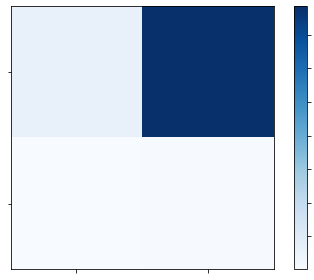

Tempo gasto fold 8 - 00:00:00
For fold 9:
Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.43      0.60      1690
           1       0.01      0.83      0.02        12

    accuracy                           0.43      1702
   macro avg       0.50      0.63      0.31      1702
weighted avg       0.99      0.43      0.60      1702

               Acuracy  Precision    Recall  F1-score    F-beta       MCC  \
Decision Tree  0.43302   0.010277  0.833333  0.020305  0.048972  0.044557   

                 TP     TN  ROC Curve  
Decision Tree  10.0  727.0   0.631755  
Confusion matrix, without normalization
[[727 963]
 [  2  10]]


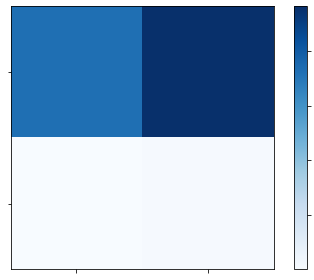

Tempo gasto fold 9 - 00:00:00
For fold 10:
Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.41      0.58      1690
           1       0.01      1.00      0.02        12

    accuracy                           0.42      1702
   macro avg       0.51      0.71      0.30      1702
weighted avg       0.99      0.42      0.58      1702

                Acuracy  Precision  Recall  F1-score   F-beta       MCC    TP  \
Decision Tree  0.416569    0.01194     1.0  0.023599  0.05698  0.070175  12.0   

                  TN  ROC Curve  
Decision Tree  697.0   0.706213  
Confusion matrix, without normalization
[[697 993]
 [  0  12]]


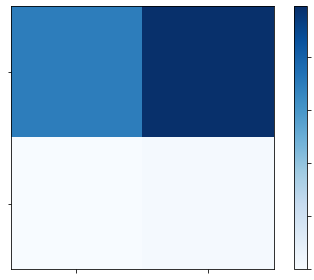

Tempo gasto fold 10 - 00:00:00



(                Acuracy  Precision    Recall  F1-score    F-beta       MCC  \
 Decision Tree  0.465922   0.011859  0.931624  0.023421  0.056424  0.070175   
 
                   TP      TN  ROC Curve  
 Decision Tree  109.0  7821.0   0.697161  ,
          Acuracy  Precision    Recall  F1-score    F-beta       MCC     TP  \
 Fold1   0.407168   0.010784  1.000000  0.021339  0.051692  0.065950   11.0   
 Fold2   0.566980   0.014706  1.000000  0.028986  0.069444  0.091085   22.0   
 Fold3   0.846063   0.036900  0.909091  0.070922  0.158730  0.165296   32.0   
 Fold4   0.185664   0.008584  1.000000  0.017021  0.041494  0.039294   44.0   
 Fold5   0.445358   0.012552  1.000000  0.024793  0.059761  0.074437   56.0   
 Fold6   0.317861   0.009394  0.916667  0.018597  0.045119  0.041587   67.0   
 Fold7   0.964160   0.144928  0.833333  0.246914  0.427350  0.338726   77.0   
 Fold8   0.076381   0.006329  0.833333  0.012563  0.030713 -0.031028   87.0   
 Fold9   0.433020   0.010277  0.833333  0.

In [607]:
cv(X,y,dct,'Decision Tree', balancer=nm)

**Cross_validation OverSample**

For fold 1:
Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1691
           1       0.07      1.00      0.13        11

    accuracy                           0.92      1702
   macro avg       0.54      0.96      0.55      1702
weighted avg       0.99      0.92      0.95      1702

                Acuracy  Precision  Recall  F1-score    F-beta       MCC  \
Decision Tree  0.916569   0.071895     1.0  0.134146  0.279188  0.256628   

                 TP      TN  ROC Curve  
Decision Tree  11.0  1549.0   0.958013  
Confusion matrix, without normalization
[[1549  142]
 [   0   11]]


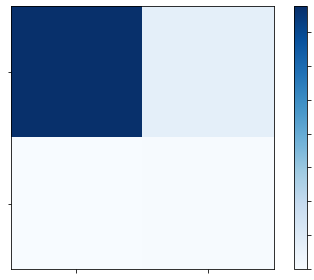

best fold 1
Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1691
           1       0.07      1.00      0.13        11

    accuracy                           0.92      1702
   macro avg       0.54      0.96      0.55      1702
weighted avg       0.99      0.92      0.95      1702

                Acuracy  Precision  Recall  F1-score    F-beta       MCC  \
Decision Tree  0.916569   0.071895     1.0  0.134146  0.279188  0.256628   

                 TP      TN  ROC Curve  
Decision Tree  11.0  1549.0   0.958013  
Confusion matrix, without normalization
[[1549  142]
 [   0   11]]


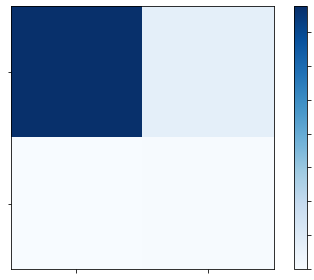

Tempo gasto fold 1 - 00:00:00
For fold 2:
Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.93      0.97      1691
           1       0.07      0.73      0.12        11

    accuracy                           0.93      1702
   macro avg       0.53      0.83      0.54      1702
weighted avg       0.99      0.93      0.96      1702

                Acuracy  Precision    Recall  F1-score    F-beta       MCC  \
Decision Tree  0.933608   0.067797  0.727273  0.124031  0.246914  0.208907   

                TP      TN  ROC Curve  
Decision Tree  8.0  1581.0   0.831111  
Confusion matrix, without normalization
[[1581  110]
 [   3    8]]


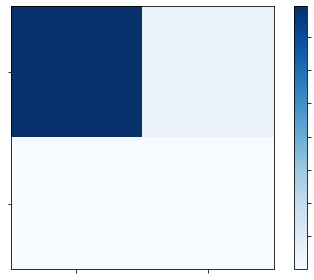

Tempo gasto fold 2 - 00:00:00
For fold 3:
Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1691
           1       0.10      0.91      0.18        11

    accuracy                           0.94      1702
   macro avg       0.55      0.93      0.57      1702
weighted avg       0.99      0.94      0.97      1702

                Acuracy  Precision    Recall  F1-score    F-beta       MCC  \
Decision Tree  0.944771   0.097087  0.909091  0.175439  0.340136  0.287032   

                 TP      TN  ROC Curve  
Decision Tree  10.0  1598.0   0.927047  
Confusion matrix, without normalization
[[1598   93]
 [   1   10]]


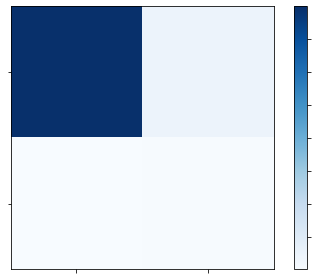

Tempo gasto fold 3 - 00:00:00
For fold 4:
Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1690
           1       0.14      0.92      0.25        12

    accuracy                           0.96      1702
   macro avg       0.57      0.94      0.62      1702
weighted avg       0.99      0.96      0.97      1702

                Acuracy  Precision    Recall  F1-score    F-beta       MCC  \
Decision Tree  0.961222   0.144737  0.916667      0.25  0.443548  0.355765   

                 TP      TN  ROC Curve  
Decision Tree  11.0  1625.0   0.939103  
Confusion matrix, without normalization
[[1625   65]
 [   1   11]]


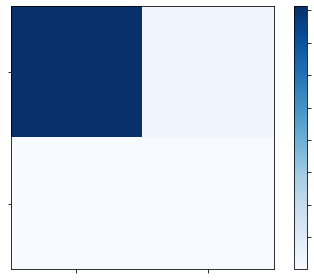

Tempo gasto fold 4 - 00:00:00
For fold 5:
Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1690
           1       0.16      1.00      0.27        12

    accuracy                           0.96      1702
   macro avg       0.58      0.98      0.63      1702
weighted avg       0.99      0.96      0.98      1702

               Acuracy  Precision  Recall  F1-score  F-beta       MCC    TP  \
Decision Tree  0.96181   0.155844     1.0  0.269663    0.48  0.387105  12.0   

                   TN  ROC Curve  
Decision Tree  1625.0   0.980769  
Confusion matrix, without normalization
[[1625   65]
 [   0   12]]


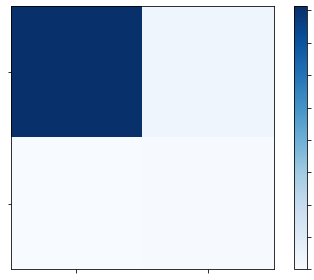

best fold 5
Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1690
           1       0.16      1.00      0.27        12

    accuracy                           0.96      1702
   macro avg       0.58      0.98      0.63      1702
weighted avg       0.99      0.96      0.98      1702

               Acuracy  Precision  Recall  F1-score  F-beta       MCC    TP  \
Decision Tree  0.96181   0.155844     1.0  0.269663    0.48  0.387105  12.0   

                   TN  ROC Curve  
Decision Tree  1625.0   0.980769  
Confusion matrix, without normalization
[[1625   65]
 [   0   12]]


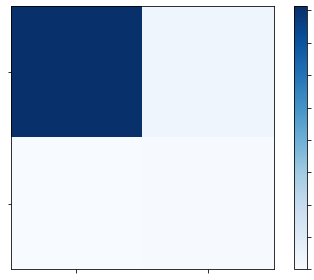

Tempo gasto fold 5 - 00:00:00
For fold 6:
Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1690
           1       0.13      0.92      0.22        12

    accuracy                           0.95      1702
   macro avg       0.56      0.94      0.60      1702
weighted avg       0.99      0.95      0.97      1702

                Acuracy  Precision    Recall  F1-score    F-beta       MCC  \
Decision Tree  0.954759   0.126437  0.916667  0.222222  0.407407  0.331172   

                 TP      TN  ROC Curve  
Decision Tree  11.0  1614.0   0.935848  
Confusion matrix, without normalization
[[1614   76]
 [   1   11]]


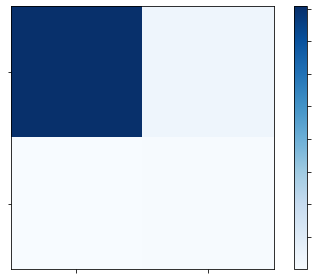

Tempo gasto fold 6 - 00:00:00
For fold 7:
Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1690
           1       0.19      0.83      0.31        12

    accuracy                           0.97      1702
   macro avg       0.59      0.90      0.65      1702
weighted avg       0.99      0.97      0.98      1702

                Acuracy  Precision    Recall  F1-score   F-beta       MCC  \
Decision Tree  0.973561   0.188679  0.833333  0.307692  0.49505  0.389169   

                 TP      TN  ROC Curve  
Decision Tree  10.0  1647.0   0.903945  
Confusion matrix, without normalization
[[1647   43]
 [   2   10]]


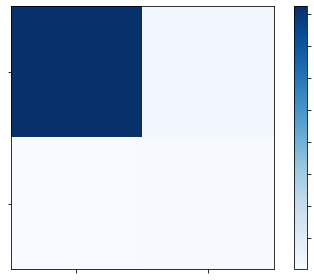

Tempo gasto fold 7 - 00:00:00
For fold 8:
Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.18      0.75      0.29        12

    accuracy                           0.97      1702
   macro avg       0.59      0.86      0.64      1702
weighted avg       0.99      0.97      0.98      1702

                Acuracy  Precision  Recall  F1-score    F-beta       MCC   TP  \
Decision Tree  0.974148       0.18    0.75  0.290323  0.459184  0.359604  9.0   

                   TN  ROC Curve  
Decision Tree  1649.0    0.86287  
Confusion matrix, without normalization
[[1649   41]
 [   3    9]]


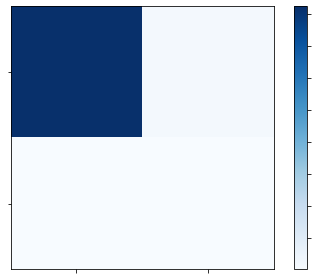

Tempo gasto fold 8 - 00:00:00
For fold 9:
Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.21      0.83      0.33        12

    accuracy                           0.98      1702
   macro avg       0.60      0.91      0.66      1702
weighted avg       0.99      0.98      0.98      1702

                Acuracy  Precision    Recall  F1-score    F-beta       MCC  \
Decision Tree  0.976498   0.208333  0.833333  0.333333  0.520833  0.409812   

                 TP      TN  ROC Curve  
Decision Tree  10.0  1652.0   0.905424  
Confusion matrix, without normalization
[[1652   38]
 [   2   10]]


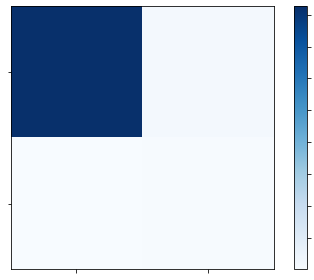

Tempo gasto fold 9 - 00:00:00
For fold 10:
Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1690
           1       0.19      0.92      0.32        12

    accuracy                           0.97      1702
   macro avg       0.60      0.94      0.65      1702
weighted avg       0.99      0.97      0.98      1702

                Acuracy  Precision    Recall  F1-score   F-beta       MCC  \
Decision Tree  0.972385   0.192982  0.916667  0.318841  0.52381  0.413651   

                 TP      TN  ROC Curve  
Decision Tree  11.0  1644.0   0.944724  
Confusion matrix, without normalization
[[1644   46]
 [   1   11]]


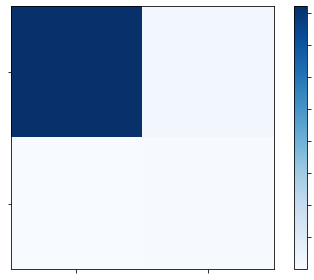

Tempo gasto fold 10 - 00:00:00



(                Acuracy  Precision    Recall  F1-score    F-beta       MCC  \
 Decision Tree  0.956933   0.125304  0.880342  0.219382  0.399225  0.413651   
 
                   TP       TN  ROC Curve  
 Decision Tree  103.0  16184.0   0.918903  ,
          Acuracy  Precision    Recall  F1-score    F-beta       MCC     TP  \
 Fold1   0.916569   0.071895  1.000000  0.134146  0.279188  0.256628   11.0   
 Fold2   0.933608   0.067797  0.727273  0.124031  0.246914  0.208907   19.0   
 Fold3   0.944771   0.097087  0.909091  0.175439  0.340136  0.287032   29.0   
 Fold4   0.961222   0.144737  0.916667  0.250000  0.443548  0.355765   40.0   
 Fold5   0.961810   0.155844  1.000000  0.269663  0.480000  0.387105   52.0   
 Fold6   0.954759   0.126437  0.916667  0.222222  0.407407  0.331172   63.0   
 Fold7   0.973561   0.188679  0.833333  0.307692  0.495050  0.389169   73.0   
 Fold8   0.974148   0.180000  0.750000  0.290323  0.459184  0.359604   82.0   
 Fold9   0.976498   0.208333  0.833333  

In [608]:
cv(X,y,dct,'Decision Tree', balancer=smt)

In [520]:
# Visualize Decision Tree
#from sklearn.tree import export_graphviz

columns = ['balance_ether','total_transactions', 'sent', 'received', 'n_contracts_sent', 'n_contracts_received']
# Creates dot file named tree.dot
tree.export_graphviz(
            dct,
            out_file =  "myTreeName.dot",
            feature_names = columns,
            #class_names = classes,
            filled = True,
            rounded = True)

**Feature Importance**

In [522]:
importances = pd.DataFrame({'feature':['balance_ether','total_transactions', 'sent', 'received', 'n_contracts_sent', 
                                       'n_contracts_received'],
                            'importance':np.round(dct.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
1,total_transactions,0.911
0,balance_ether,0.047
4,n_contracts_sent,0.021
2,sent,0.018
3,received,0.004
5,n_contracts_received,0.000
